<a href="https://colab.research.google.com/github/doxxa11/TugasMinggu14KelasPython/blob/main/Tugas_Minggu_14_Ardio_Pratama_Putra_1101193327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Minggu 14**


*Kalkulasi dan Visualisasi data Path Loss COST 231, Daya Transmitter, Signal to Noise Ratio, dan Kapasitas Seluler dengan parameter yang sudah ditentukan*


oleh


Ardio Pratama Putra

1101193327



---

---
#Eksternal Library

---

---











In [96]:
#Memasukan library eksternal python

import numpy as np
import matplotlib.pyplot as plt



---

---
#Path Loss

---

---








In [97]:
#Mendefinisikan fungsi perhitungan path loss COST 231 
#Dengan parameter jarak, frekuensi,tipe area, tinggi antena pemancar dan penerima

def pathlossmod(d, fc, area, pem, pen):
  
  #Sinkronisasi variabel c1 dan c2 terhadap fc

  if fc in range(150,1501):
    c1 = 69.55
    c2 = 26.16
  elif fc in range(1501,2001):
    c1 = 46.3
    c2 = 33.9

  #Penentuan area yang diinginkan

  if (area == "Urban"): #Daerah Urban
    Cm = 0
  elif (area == "Suburban"): #Daerah Suburban
    Cm = -2*((np.log10((fc/28)**2))-5.4)
  elif (area == "Open"): #Daerah Open
    Cm = -4.78*(np.log10(fc))+18.33*(np.log10(fc))-40.94

  #Perumusan kalkulasi

  apen = (1.1*np.log10(fc) - 0.7)*pen - (1.56*np.log10(fc) - 1.8)
  losspath = c1 + (c2*np.log10(fc)) - (13.83*np.log10(pem)) - apen + ((44.9-6.55*np.log10(pem))*np.log(d)) - Cm
  return losspath

In [98]:
#Assign variable yang sesuai dengan arahan
tingtower = 80      #meter
tinguser = 1.5      #meter
dmax = 1000         #meter
dmin = 300          #meter
n = 200             #user
loc1 = "Urban"
loc2 = "Suburban"
loc3 = "Open"
f1 = 1800           #Mhz
f2 = 900            #Mhz
f3 = 700            #Mhz

#Memasukan data random dari bernilai 200 hingga 700 dan berjumlah 200 buah integer
dran=np.random.randint(dmin,dmax,n)

In [99]:
#Memanggil fungsi kalkulasi dengan variabel yang sudah diarahkan

#1
lpUrban = pathlossmod(dran,f1,loc1,tingtower,tinguser)
lpSuburban = pathlossmod(dran,f1,loc2,tingtower,tinguser)
lpOpen = pathlossmod(dran,f1,loc3,tingtower,tinguser)

#2
lpUrban2 = pathlossmod(dran,f2,loc1,tingtower,tinguser)
lpUrban3 = pathlossmod(dran,f3,loc1,tingtower,tinguser)

In [100]:
#Melakukan sorting data agar lebih rapi saat divisualisasikan

#Sorting Jarak
sortingdran=dran[np.argsort(dran)]

#Sorting data arahan 1
sortingUrban=lpUrban[np.argsort(dran)]
sortingSuburban=lpSuburban[np.argsort(dran)]
sortingOpen=lpOpen[np.argsort(dran)]

#Sorting data arahan 2
sortingUrban2=lpUrban2[np.argsort(dran)]
sortingUrban3=lpUrban3[np.argsort(dran)]

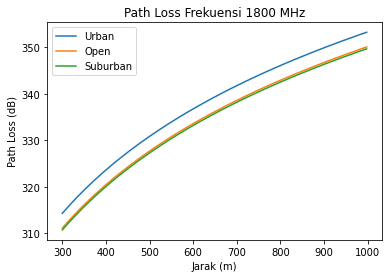

In [101]:
plt.figure()
plt.title("Path Loss Frekuensi 1800 MHz")
plt.plot(sortingdran,sortingUrban, label = "Urban")
plt.plot(sortingdran,sortingOpen, label = "Open")
plt.plot(sortingdran,sortingSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

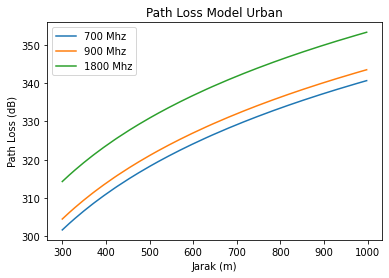

In [102]:
plt.figure()
plt.title("Path Loss Model Urban")
plt.plot(sortingdran,sortingUrban3, label = "700 Mhz")
plt.plot(sortingdran,sortingUrban2, label = "900 Mhz")
plt.plot(sortingdran,sortingUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()



---

---

#Daya Transmitter

---

---









In [103]:
def daytercal (pt, pl, gt, gr):
  dayter = (10*(np.log(pt))) - pl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [104]:
PTUrban = daytercal(power_tran, sortingUrban, gain_tran, gain_rece)
PTSuburban = daytercal(power_tran, sortingSuburban, gain_tran, gain_rece)
PTOpen = daytercal(power_tran, sortingOpen, gain_tran, gain_rece)
PTUrban2 = daytercal(power_tran, sortingUrban2, gain_tran, gain_rece)
PTUrban3 = daytercal(power_tran, sortingUrban3, gain_tran, gain_rece)

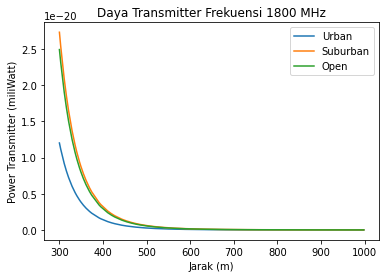

In [105]:
plt.figure()
plt.title("Daya Transmitter Frekuensi 1800 MHz")
plt.plot(sortingdran,PTUrban, label = "Urban")
plt.plot(sortingdran,PTSuburban, label = "Suburban")
plt.plot(sortingdran,PTOpen, label = "Open")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

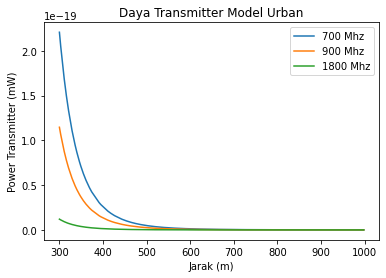

In [106]:
plt.figure()
plt.title("Daya Transmitter Model Urban")
plt.plot(sortingdran,PTUrban3, label = "700 Mhz")
plt.plot(sortingdran,PTUrban2, label = "900 Mhz")
plt.plot(sortingdran,PTUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (mW)')
plt.legend()
plt.show()



---

---

#Signal to Noise Ratio (SNR)

---

---







In [115]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [116]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

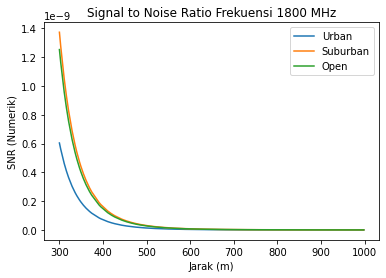

In [117]:
plt.figure()
plt.title("Signal to Noise Ratio Frekuensi 1800 MHz")
plt.plot(sortingdran,SNRUrban, label = "Urban")
plt.plot(sortingdran,SNRSuburban, label = "Suburban")
plt.plot(sortingdran,SNROpen, label = "Open")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

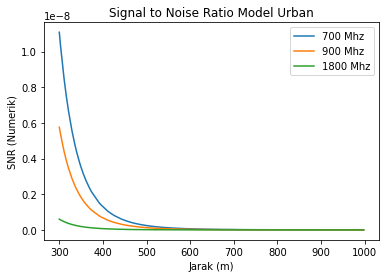

In [118]:
plt.figure()
plt.title("Signal to Noise Ratio Model Urban")
plt.plot(sortingdran,SNRUrban3, label = "700 Mhz")
plt.plot(sortingdran,SNRUrban2, label = "900 Mhz")
plt.plot(sortingdran,SNRUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()



---

---

#Kapasitas Seluler


---

---






In [111]:
def kpsts (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [112]:
KapasitasUrban = kpsts(SNRUrban, bw)
KapasitasSuburban = kpsts(SNRSuburban, bw)
KapasitasOpen = kpsts(SNROpen, bw)
KapasitasUrban2 = kpsts(SNRUrban2, bw)
KapasitasUrban3 = kpsts(SNRUrban3, bw)

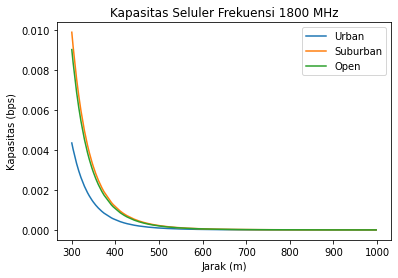

In [113]:
plt.figure()
plt.title("Kapasitas Seluler Frekuensi 1800 MHz")
plt.plot(sortingdran,KapasitasUrban, label = "Urban")
plt.plot(sortingdran,KapasitasSuburban, label = "Suburban")
plt.plot(sortingdran,KapasitasOpen, label = "Open")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()

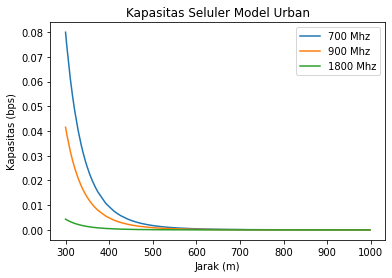

In [114]:
plt.figure()
plt.title("Kapasitas Seluler Model Urban")
plt.plot(sortingdran,KapasitasUrban3, label = "700 Mhz")
plt.plot(sortingdran,KapasitasUrban2, label = "900 Mhz")
plt.plot(sortingdran,KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()